In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
data=pd.read_csv("V:\Data Science\docs\Heart Attack.csv")
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [22]:
data["class"]=data["class"].replace({'positive':1,'negative':0})
data.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_20640\2150378083.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["class"]=data["class"].replace({'positive':1,'negative':0})


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [23]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [24]:
x=data.iloc[:,0:8]
y=data.iloc[:,8]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)

stand_data=scaler.transform(x)
stand_data

array([[ 5.72357956e-01,  7.18395402e-01, -2.39032215e-01, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57963993e+00,  7.18395402e-01,  3.03491001e-01, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.73625310e-02,  7.18395402e-01, -2.77783874e-01, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20385295e-01,  7.18395402e-01,  1.29108539e-01, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60664807e-01,  7.18395402e-01, -3.94038849e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80571637e-01,  7.18395402e-01,  3.03491001e-01, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

In [26]:
x=pd.DataFrame(stand_data)
x

,0,1,2,3,4,5,6,7
0,0.572358,0.718395,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342
1,-2.579640,0.718395,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701
2,-0.087363,0.718395,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140
3,0.572358,0.718395,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032
4,-0.087363,0.718395,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140
...,...,...,...,...,...,...,...,...
1314,-0.893688,0.718395,0.303491,-0.198009,-0.375600,0.765951,-0.294633,-0.307541
1315,0.718963,0.718395,0.109733,-0.083123,-1.230995,0.031586,-0.301111,-0.163710
1316,-0.820385,0.718395,0.129109,1.563578,2.261869,-0.676074,-0.303054,3.369688
1317,-0.160665,0.718395,-0.394039,-0.389486,-0.304317,3.957101,-0.204587,-0.001683


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=214)

In [28]:
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
parameters={
    "n_estimators":[100,150,200,250,500],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split":[0.1,0.3,0.5],
    "max_depth":[1,2,3,4]
}

rfc=RandomForestClassifier()
search=RandomizedSearchCV(rfc,parameters,cv=cv,verbose=1,random_state=1,n_iter=10,scoring='accuracy',n_jobs=-1)
model=search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [29]:
model.best_score_

0.9886255924170616

In [30]:
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=0.3,
                       n_estimators=200)

In [31]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 0.3,
 'max_depth': 4,
 'criterion': 'entropy'}

In [32]:
#classification model
cmr=model.best_estimator_
cmr2=cmr.fit(x_train,y_train)
cmr2

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=0.3,
                       n_estimators=200)

In [33]:
pred_r=cmr2.predict(x_test)

pred_r

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [34]:
pred_r=pd.DataFrame(pred_r)
pred_r

,0
0,1
1,1
2,0
3,0
4,0
...,...
259,0
260,1
261,0
262,1


In [35]:
pr=accuracy_score(pred_r,y_test)
pr

0.9810606060606061

Text(0, 0.5, 'predicted')

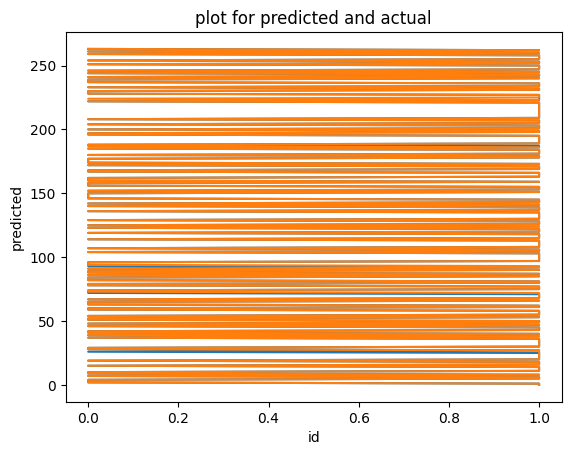

In [65]:
import matplotlib.pyplot as plt

plt.plot(pred_r, range(len(pred_r)))
plt.plot(y_test, range(len(pred_r)))
plt.title("plot for predicted and actual")
plt.xlabel('id')
plt.ylabel('predicted')

In [36]:
#Random Forest Classification using GridSearchCV()
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
parameters={
    "n_estimators":[100,150,200,250,500],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split":[0.1,0.3,0.5],
    "max_depth":[1,2,3,4]
}

rfc=RandomForestClassifier()
search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=cv)
model=search.fit(x_train,y_train)

In [37]:
model.best_score_

0.9886255924170616

In [38]:
model.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_split=0.1, n_estimators=150)

In [39]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 0.1,
 'n_estimators': 150}

In [40]:
cmr=model.best_estimator_
cmr2=cmr.fit(x_train,y_train)
cmr2

RandomForestClassifier(max_depth=3, min_samples_split=0.1, n_estimators=150)

In [41]:
pred_rg=cmr2.predict(x_test)
pred_rg

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [42]:
pred_rg=pd.DataFrame(pred_rg)
pred_rg

,0
0,1
1,1
2,0
3,0
4,0
...,...
259,0
260,1
261,0
262,1


In [43]:
prg=accuracy_score(pred_rg,y_test)
prg

0.9810606060606061

Text(0, 0.5, 'predicted')

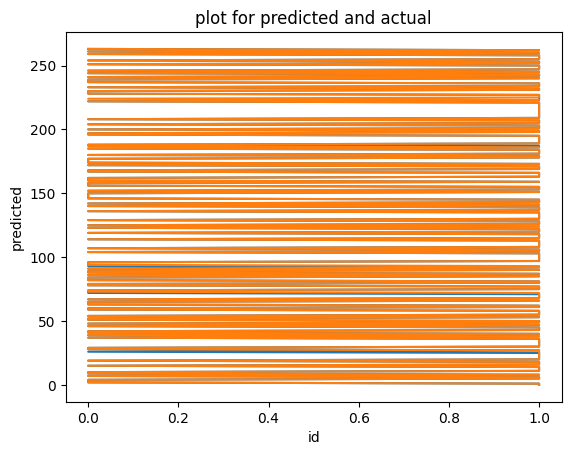

In [64]:
import matplotlib.pyplot as plt

plt.plot(pred_rg, range(len(pred_rg)))
plt.plot(y_test, range(len(pred_rg)))
plt.title("plot for predicted and actual")
plt.xlabel('id')
plt.ylabel('predicted')

In [44]:
#Decision Tree Classifier using RandomizedSearhcv()
from scipy.stats import uniform, poisson
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
parameters={
            'criterion':['gini','entropy'],
            'max_depth':poisson(mu=2,loc=2),
            'min_samples_split':uniform(),
            'max_leaf_nodes':poisson(mu=4,loc=3)
}

rfc=DecisionTreeClassifier()
search=RandomizedSearchCV(rfc,parameters,cv=cv,verbose=1,random_state=1,n_iter=10,scoring='accuracy',n_jobs=-1)
model=search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
model.best_score_

0.9886255924170616

In [46]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=4,
                       min_samples_split=0.4692385264381431)

In [47]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 4,
 'min_samples_split': 0.4692385264381431}

In [48]:
cmdr=model.best_estimator_
cmdr2=cmdr.fit(x_train,y_train)
cmdr2

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=4,
                       min_samples_split=0.4692385264381431)

In [49]:
pred_dr=cmdr2.predict(x_test)
pred_dr

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [50]:
pred_dr=pd.DataFrame(pred_dr)
pred_dr

,0
0,1
1,1
2,0
3,0
4,0
...,...
259,0
260,1
261,0
262,1


In [51]:
pdr=accuracy_score(pred_dr,y_test)
pdr

0.9810606060606061

Text(0, 0.5, 'predicted')

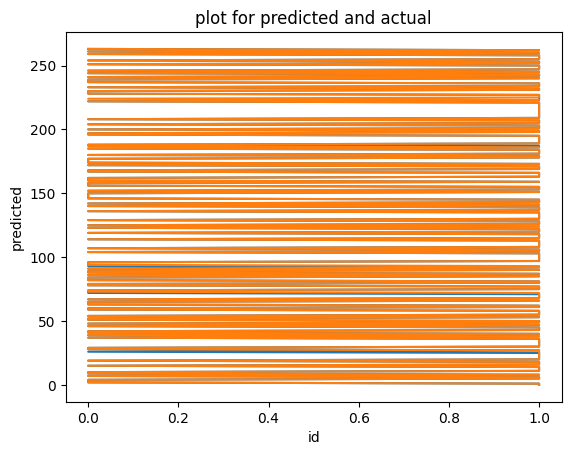

In [63]:
import matplotlib.pyplot as plt

plt.plot(pred_dr, range(len(pred_dr)))
plt.plot(y_test, range(len(pred_dr)))
plt.title("plot for predicted and actual")
plt.xlabel('id')
plt.ylabel('predicted')

In [52]:
#Decision Tree Classifier using GridSearchcv()

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
parameters={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

svcm=DecisionTreeClassifier()
search=GridSearchCV(estimator=svcm, 
                           param_grid=parameters, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
model=search.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [53]:
model.best_score_

0.9914664707915659

In [54]:
model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [55]:
model.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [56]:
cmd=model.best_estimator_
cmd2=cmd.fit(x_train,y_train)
cmd2

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [57]:
pred_d=cmd2.predict(x_test)

pred_d

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [58]:
pred_d=pd.DataFrame(pred_d)
pred_d

,0
0,1
1,1
2,0
3,0
4,0
...,...
259,0
260,1
261,0
262,1


In [59]:
p_d=accuracy_score(pred_d,y_test)
p_d

0.9886363636363636

Text(0, 0.5, 'predicted')

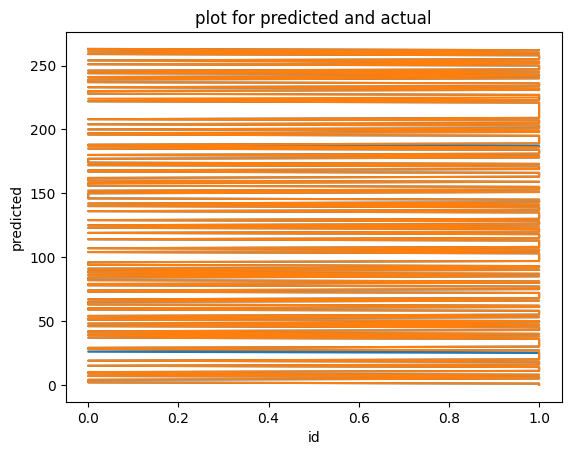

In [62]:
import matplotlib.pyplot as plt

plt.plot(pred_d, range(len(pred_d)))
plt.plot(y_test, range(len(pred_d)))
plt.title("plot for predicted and actual")
plt.xlabel('id')
plt.ylabel('predicted')